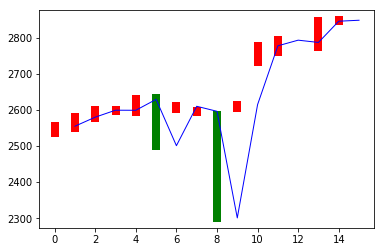

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

date = np.linspace(1, 15, 15)
endPrice = np.array([
2554.8586,
2579.8743,
2599.1479,
2598.967,
2629.1641,
2500.8367,
2610.0086,
2596.1464,
2300.7615,
2614.5817,
2777.5227,
2793.179,
2786.8878,
2845.6801,
2848.3721    
])
beginPrice = np.array([2536.2675,
2549.5634,
2576.6495,
2597.9737,
2593.7407,
2634.0491,
2602.1526,
2594.0881,
2584.5822,
2605.8876,
2733.8819,
2759.126,
2786.8878,
2775.557,
2847.4181
]
)
plt.figure()
for i in range(0, 15):
    dateOne = np.zeros([2])
    dateOne[0] = i
    dateOne[1] = i 
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne, priceOne, 'r', lw = 8)
    else:
        plt.plot(dateOne, priceOne, 'g', lw = 8)
        
#plt.show()



#Use Neuron Network to predic the stock price
#Input: date (A)
#Output: Price (C)
#A(15x1)*w1(1x10)+b1(1*10) = B(15x10)
#B(15x10)*w2(10x1)+b2(15x1) = C(15x1)
dateNormal = np.zeros([15, 1])
priceNormal = np.zeros([15, 1])
for i in range(0, 15):
    dateNormal[i, 0] = i/14.0;
    priceNormal[i, 0] = endPrice[i]/3000.0;
    
# Input layer   (x -> date; y -> price)  
x = tf.placeholder(tf.float32, [None, 1])   # row: n, col: 1
y = tf.placeholder(tf.float32, [None, 1])

#Hiden Layler
w1 = tf.Variable(tf.random_uniform([1, 10], 0, 1))
b1 = tf.Variable(tf.zeros([1, 10] ))
wb1 = tf.matmul(x, w1) + b1

layer1 = tf.nn.relu(wb1) # active function

#Output Layer
w2 = tf.Variable(tf.random_uniform([10, 1], 0, 1))
b2 = tf.Variable(tf.zeros([15, 1] ))
wb2 = tf.matmul(layer1, w2) + b2

layer2 = tf.nn.relu(wb2)

loss = tf.reduce_mean(tf.square(y-layer2)) # Y: true value; layer2: predicted value

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer() )
    for i in range(0, 10000):
        sess.run(train_step, feed_dict = {x: dateNormal, y:priceNormal})
        
    # validate    
    pred = sess.run(layer2, feed_dict={x:dateNormal})
    predPrice = np.zeros( [15, 1] ) 
    for i in range(0, 15):
        predPrice[i, 0] = (pred*3000)[i, 0]
    plt.plot(date, predPrice, 'b', lw=1)

plt.show()
    


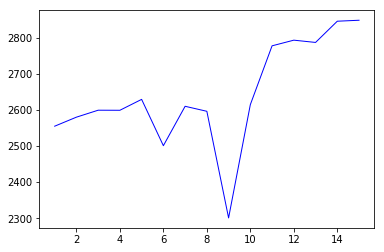